In [1]:
# start by loading data on the returns of the market portfolio and the risk-free rate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Value Investing

One of the most popular quantitative investing strategies is broadly refered to as "value investing"

* It consists of tilting the portfolio towards stocks that have a low price relative to a proxy for it's fundamental value

* and tilt away form stocks with high price relative to fundamentals

* Broadly speaking: Buy cheap, sell expensive

* weights: 

$$W_t \propto \frac{F_t}{P_t}$$

* Where $F_t$ is some proxy for the firm's fundamental value

* typically some accounting measure

* There is a vast number of proxys for fundamentals

  * Dividends
  * Book value
  * Earnings
  * Cash flows
  * Sales

* The strategy is the "cross-sectional" counterpart of market timing strategies that rely on dividend yield of aggregate market as a proxy for whether the market is expensive.

* However, the evidence is that cross-sectional strategy is more reliable, even if it still quite risky. It actually has done terribly in the last 10 years!



 

**Literature**

* [Lakonishok, Shleifer, and Vishny (1994) ](https://www8.gsb.columbia.edu/sites/valueinvesting/files/files/CIER.pdf)– value and
growth effect with a behavioral interpretation.

* [Fama and French (1996)](https://onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1540-6261.1996.tb05202.x) – comprehensive analysis of
all anomalies, with a rational risk-based interpretation.

**Why this might work?**


* The fact that the market value is above or below the book value does not mean that the firm is mispriced. It is natural that the expectation of future earnings changed (which is not in book value), or investors' perception of risk changed.

* Even in a CAPM world you can see that happening: suppose the beta of a firm increases, then in equilibrium it's excess return must also increase! 

  - This would mean if it's market value goes down, Book-to-Market would go up at the same time, making expected returns going forward go up!

  - But in the data we see when BM changes (as firms swing across portfolios), the market beta does not, which is inconsitent with the CAPM


* Lots of theories that attempt to explain the value-growth spread, both "rational" and "behavioral"

* Here is a flavor of a few of these theories

* Behavioral: LSV argue that value vs. growth strategies (contrarian strategies) exploit naive investor behavior and are not riskier.
   - Investors may extrapolate earnings too far in the future, may overreact to news, assume a trend in stock prices, or equate a good company with a good investment.
   - Stocks that have done well in the past are Growth stocks that are ‘glamorous’ to investors. People tend to want to buy these and stampede towards them, pushing up the price, and depressing their future returns. Value stocks have been neglected, people tend to overreact to these poorly performing firms, causing their prices to fall too much, and expected returns to rise. Psychological evidence suggests people form these naive strategies. This is an overreaction story, and a contrarian strategy exploits it.
   - LSV also argue that value stocks are not riskier than growth stocks.
   
      - they don’t have higher variance
      - they don’t have high downside risk (i.e., do not underperform often or by that much)
      - they don’t have higher betas
      - they don’t underperform in bad states of the world

    
* Rational: FF argue Value firms are riskier than growth because thery are more exposed to the risk of distress (for example value did terribly in 2008 and 2020)  
   - The argue it is consistent with equilibrium models of ICAPM/APT  
    
    
    
* Overall most academics think there is a behavioral component in value, but quite a bit has to do with more rational factors, i.e. value is riskier than growth in a variety of ways


**Construction**

* In these notes we will get the "value signal" ready and focus on building our portfolios

* In the subsection "Value Signal Construction" we show one way to construct the "Book-To-Market" value signal from the ground up




In [2]:
url = "https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/value_characteristic.csv"
parser = lambda date: pd.to_datetime(date,format='%m%y')
Data = pd.read_csv(url,parse_dates=[0])
# This simply shits the date to be in an end of month basis
Data.date=Data.date+pd.tseries.offsets.MonthEnd()
Data.rename(columns={'size':'log_mcap'},inplace=True)
Data

,date,permno,re,rf,log_mcap,value
0,1972-07-31,10006,0.028600,0.0031,12.399869,-0.125361
1,1972-07-31,10102,0.039757,0.0031,12.217334,0.354954
2,1972-07-31,10137,-0.044767,0.0031,13.069874,-0.088697
3,1972-07-31,10145,-0.062422,0.0031,13.608366,0.075484
4,1972-07-31,10153,-0.065600,0.0031,11.752572,0.944457
...,...,...,...,...,...,...
486422,2016-12-31,93420,0.011056,0.0003,14.337515,1.049163
486423,2016-12-31,93422,-0.063881,0.0003,15.256946,0.829353
486424,2016-12-31,93423,0.039950,0.0003,15.502888,-2.128977
486425,2016-12-31,93429,0.072124,0.0003,15.504722,-3.001095


- above we load a data set with our value signal, Book-to-Market already constructed. Here is the definition of the value variable:
     
     >Value (annual) (value). Follows Fama and French (1993). value = log(BE/ME). At the end of June of each year, we use book equity from the previous fiscal year and market equity from December of the previous year. Rebalanced annually. 

- The data set also containts a size variable:

   > Size (size). Follows Fama and French (1993). size = MEJun. The CRSP end of June price times shares outstanding. Rebalanced annually.
   
   **I believe this is in logs as well. Need to check**
   
And contains excess returns (re) for individual stocks and the risk-free rate  of the relvant date

- permno is an identifier for the stock

- Note the format of the data set where stock and dates are stacked vertically

- We will need two indexes (date and permno) to perfectly identify an observation


**->This means we will start with step 1 already done for us (signal construction), and we will move directly to step 2**

**Details on how the value signal was constructed**

* Value portfolios are typically rebalanced every July using Book-to-Market data from the year before    
* This means that from July/2006 to June/2007 you use Book-to-Market data from December/2005
* Because the way we construct the data, the BM data is the same from Jan/2005 to December/2005

**What is important is that it is lagged by at least 12 months, to make sure that the BM data was available at the day of portfolio formation!**

**What does the value signal look like?**

<AxesSubplot:>

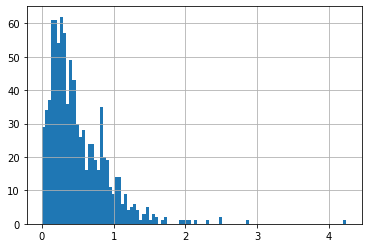

In [3]:
# lets look at what out value measure looks like for a particular date:
np.exp(Data[Data.date=='2016-12-31'].value).hist(bins=100)


- A lot of cross-section variation across firms

- some firms have very low book-to-market: accounting value low relative to market value

- Other firms have high book to market: accounting value high relative to market value

<AxesSubplot:xlabel='date'>

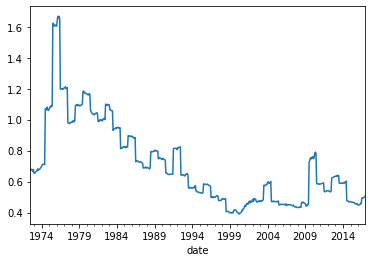

In [4]:
# lets look overtime
Data.groupby(by='date').value.apply(lambda x: np.exp(x).mean()).plot()

* a lot of time-variation in it

  * everything tends to be value at the same time 
  
* instead of time-variation, strategy that we want to construct want to explore variation across stocks

* lets look at how the signal dispersion changed



<AxesSubplot:xlabel='date'>

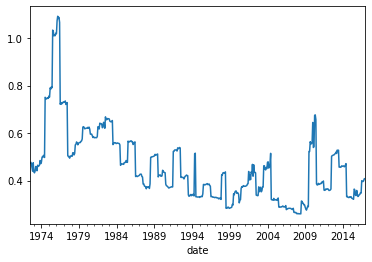

In [5]:
Data.groupby(by='date').value.apply(lambda x: np.exp(x).std()).plot()

**Quantitative investing is all about ranking**

* [$\checkmark$] Get returns for each asset

* [$\checkmark$] Construct the signals for each asset

- \[X\]  Rank the signals in each date

- \[X\]  Choose how many assets to pool together. Trade-off between signal strength and diversification

     * If you only buy the highest signal asset, you lose diversification

**How to rank?**


- We will assign the stocks in to quantiles according to it's relative characteristic position in the particular date

In [6]:
df=Data.copy()


**Group assets by signal**


* We have our trading signal for each stock in each date.

* We now need to assign groups to each stocks. These groups will identify to which portfolio each stock belongs in a particular date

* We will do this by applying the function [pd.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  to the `value` signal. This will "cut" the signal distribution in the chosen number of groups. 

* The important aspects is that we will applying this date by date. This make the strategy cross-sectional becasue you are usign the distribution of the signal as given date to the grouping

* Details
   - `duplicates='drop'`: In case there are two stocks with exactly the same signal that are exactly in the cutoff of the groups, we drop one of the observations 
   - ` labels=False`: The method simply label the groups with numbers. For example if `ngroups=10` then it will assign `0` to the stocks with the  bottom 10% returns in a given date, `1` to stocks with returns in between 10% and 20% of the signal distribution on a given date, ..., and 9 for stocks in the top 10% (signal in between 90% and 100% of the return distribution on a given date) .
   

In [36]:
ngroups=10
df['value_group']=df.groupby(['date'])['value'].apply(lambda x: pd.qcut(x, ngroups, labels=False,duplicates='drop'))
df

,date,permno,re,rf,log_mcap,value,value_group,r
0,1972-07-31,10006,0.028600,0.0031,12.399869,-0.125361,7,0.031700
1,1972-07-31,10102,0.039757,0.0031,12.217334,0.354954,9,0.042857
2,1972-07-31,10137,-0.044767,0.0031,13.069874,-0.088697,7,-0.041667
3,1972-07-31,10145,-0.062422,0.0031,13.608366,0.075484,8,-0.059322
4,1972-07-31,10153,-0.065600,0.0031,11.752572,0.944457,9,-0.062500
...,...,...,...,...,...,...,...,...
486422,2016-12-31,93420,0.011056,0.0003,14.337515,1.049163,9,0.011356
486423,2016-12-31,93422,-0.063881,0.0003,15.256946,0.829353,9,-0.063581
486424,2016-12-31,93423,0.039950,0.0003,15.502888,-2.128977,1,0.040250
486425,2016-12-31,93429,0.072124,0.0003,15.504722,-3.001095,0,0.072424


**From signals to weights: Portfolio formation tradeoffs**

* We will start by constructing Equal weighted portfolios within each signal bucket

* Why not sort in 100 groups instead on only 10? This way your top value would be much more value

* Why no simply focus on the highest value stock?


  1. Individual stocks have $\sigma$ = 40 − 80%, so $\sigma/\sqrt{T}$ makes it nearly impossible to accurately measure E(R). Portfolios have lower $\sigma$ by diversification.
  2. So if you have to trade-off strengh of the signal against benefits of diversification

**Calculate the portfolio return**

We will do market cap weights, but you could do Equal weight or even sginal weights

$$\sum_i^I w_{it} r_{it}$$

Where the weights must add up to 1.

Before forming portfolios we will use the risk-free rate so we form fully invested portfolios. So the ouput will be returns and not excess returns

**Equal weighted returns**

In [37]:
df['r']=df.re+df.rf
value_ew =df.groupby(['date','value_group']).r.mean()
value_ew=value_ew.unstack(level=-1)
value_ew.tail(20)

value_group,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,
2015-05-31,0.020891,0.006472,0.010265,0.017035,0.016231,0.027244,0.014574,0.018386,0.004064,0.001198
2015-06-30,0.004215,-0.000764,-0.013654,-0.013237,-0.003191,-0.020838,-0.006183,-0.015351,-0.022471,-0.018386
2015-07-31,0.039698,0.013510,0.013946,0.010401,-0.004838,-0.006653,-0.018376,-0.004828,-0.004417,-0.031814
2015-08-31,-0.069617,-0.066686,-0.070502,-0.052739,-0.053712,-0.050178,-0.052323,-0.038714,-0.045409,-0.038347
2015-09-30,-0.034040,-0.028862,-0.038530,-0.037669,-0.040816,-0.049398,-0.046280,-0.048378,-0.015625,-0.043819
2015-10-31,0.061735,0.063521,0.071701,0.062710,0.083448,0.063162,0.063792,0.047935,0.041700,0.069384
2015-11-30,0.024100,0.002899,0.010890,0.020665,-0.002211,0.007723,0.004607,0.008871,0.017981,0.007222
2015-12-31,-0.019230,-0.015547,-0.028668,-0.032941,-0.030588,-0.037570,-0.049422,-0.070733,-0.043649,-0.062711
2016-01-31,-0.093576,-0.063258,-0.056918,-0.059868,-0.074639,-0.073919,-0.067142,-0.046543,-0.059390,-0.055013


**Market cap weighted returns**

In [38]:
df['r']=df.re+df.rf
value_mw =df.groupby(['date','value_group']).apply(lambda x:(x.r*np.exp(x.log_mcap)).sum()/np.exp(x.log_mcap).sum())
value_mw=value_mw.unstack(level=-1)
value_mw.tail(5)

value_group,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,
2016-08-31,-0.007946,-0.017826,0.014113,0.001031,-0.005715,0.002380,0.013025,0.004344,0.007665,0.032955
2016-09-30,0.005064,-0.007285,-0.007487,0.011192,-0.000677,0.007086,-0.027298,0.007607,0.006284,0.008746
2016-10-31,-0.026880,-0.027232,-0.015124,-0.015628,-0.024548,-0.023671,0.002212,-0.021812,-0.000366,0.002611
2016-11-30,0.030711,0.018122,-0.002054,0.032335,0.048193,0.026620,0.094615,0.060176,0.091799,0.098415
2016-12-31,0.005870,0.009499,0.019199,0.018858,0.007704,0.007871,0.027776,0.022641,0.058082,0.030529


<AxesSubplot:xlabel='date'>

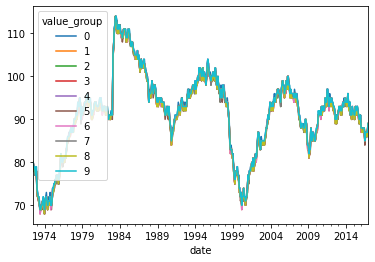

In [39]:
value_count =df.groupby(['date','value_group']).value.count()
value_count=value_count.unstack(level=-1)
value_count.plot()

<AxesSubplot:xlabel='value_group'>

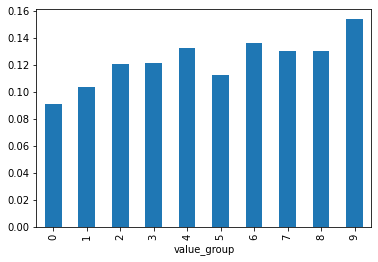

In [40]:
(value_mw.mean()*12).plot.bar()

* It is important when constructing any weights that the weights you are using are a function only of variables known before the time of the trade.

* Here in this case we are using the size variable which is the market cap of the firm last december as explained above

* what is important is that this info is tradable, ideally we would use more recent market caps, but market caps are very persistent, so the result will be similar

* If you didn't lag what would it be the problem? That is suppose that you use market cap from the end of the trading month? What bias would that introduce? Would this be a valid strategy?



<AxesSubplot:xlabel='date'>

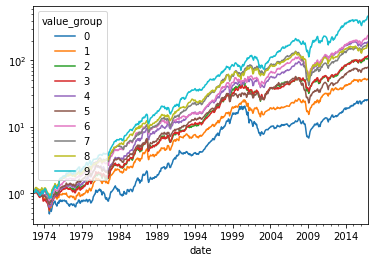

In [41]:

(value_mw+1).cumprod().plot(logy=True)

**What do you see here?**

- Over time "value" (high book to market) stocks tend to perform well going forward

- "growth" stocks  (low book to market) tend to perform poorly going forward

- You can implement a value strategy in a varity of ways depending of what you can do

     - instead of buying the market just buy portfolios 5 to 9, or even only portfolio 9
     
     - Or are you can also buy portfolio 9 and SHORT portfolio 0, that is a value minus growth strategy. Nice becasue it is close to market neutral so you can add market exposure on top of that. But of course, you do need to short!
     
   

**Long-short portfolio**

* It is a portfolio that is self-financed, for each dollar of stocks that it buys, it finances the position by shorting 1 dollar worth of stock in the other side

* So the returns of long-short portfolio are already excess returns

* We have been wroking with long-short portfolios since we discussed the concept of  excess returs

* But there our short side was always the risk-free rate

   * When we write $R^e_{mkt}=R_{mkt}-R_f$, we are constructing a long-short portfolio that goes long the market and short the risk-free asset
   
   * This portfolio as we discussed  has zero cost, i.e., you don't need any capital, so it allow us to completely separate the time-value of money question from the risk premium question
   
   * The only difference is that now our short side will be a risky asset too, but the logic is the same
   
This portfolio is nice because it isolates what the strategy is about.

Below we construct the Value minus Growth portfolio

In [42]:
value_mw[9]

date
1972-07-31   -0.015948
1972-08-31    0.066858
1972-09-30   -0.036133
1972-10-31   -0.002657
1972-11-30    0.119128
                ...   
2016-08-31    0.032955
2016-09-30    0.008746
2016-10-31    0.002611
2016-11-30    0.098415
2016-12-31    0.030529
Name: 9, Length: 534, dtype: float64

$R^9_t-R^0_t$

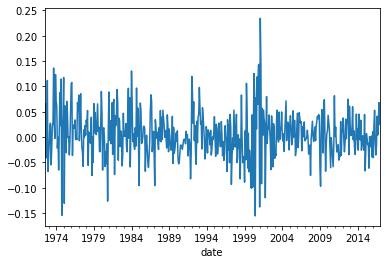

In [43]:
R_VmG=value_mw[9].subtract(value_mw[0])

(R_VmG).plot()
plt.show()

Interesting to look at returns over time

Here we look at average returns and volatiltiy on a 60 months rollign basis 

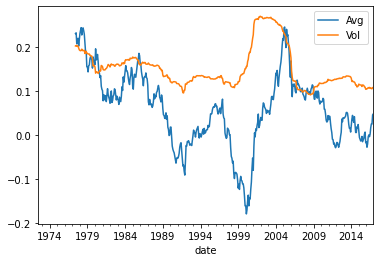

In [44]:

((R_VmG).rolling(window=60).mean()*12).plot()

((R_VmG).rolling(window=60).std()*12**0.5).plot()

plt.legend(['Avg','Vol'])


_________________


**Aside: Why test with portfolios rather than just look at stocks?**

1. Individual stocks have $\sigma$ = 40 − 80%, so $\sigma/\sqrt{T}$ makes it 
nearly impossible to accurately measure E(R). Portfolios have lower $\sigma$ by diversification.

2. Betas are badly measured too, and vary over time. 
        
   - Example: every firm starts small and risky, but eventually some of them become big and safe
        
3. You need an interesting alternative. Group stocks together that might have a violation,
this gives much more power.

4. This is what people do to (try to) make money. They don’t randomly buy stocks.
They buy stocks with certain characteristics that they think will outperform. Thus,
keep tests and practice close.

5. The CAPM seemed fine (and still does) until stocks were grouped by B/M. The
CAPM still works fine for some groupings (size), not others (value) .

But of course you need to know how to form portfolios based on which characteristcs to use.

And here the sky is the limit, as long you are careful about false discovery!

Examples:

- Stocks talked about in the media
- Stocks of CEOs tweeted by the President
- Stocks with recent deal annoucements
- Stocks with a lot of google search traffic (google trends)
- Stocks with a lot of Tweeter activity
- Stocks that are investing a lot
- Stocks that are very profitable
- Stocks that doing a lot of R&D
- Stocks invested by famous hedge fund managers
- Stocks invested by less famous managers
- Stokcs invested by Warren Buffet

____________________
